In [31]:
import requests
import pandas as pd
import re

In [6]:
raw_vaccinated_infected_data = requests.get('https://data.gov.il/api/3/action/datastore_search?resource_id=9b623a64-f7df-4d0c-9f57-09bd99a88880&limit=1000')

In [17]:
records = raw_vaccinated_infected_data.json()['result']['records']
print(f'num records: {len(records)}') 
records = pd.DataFrame(records)
records.head()

num records: 275


,_id,Week,Age_group,positive_1_6_days_after_1st_dose,positive_7_13_days_after_1st_dose,positive_14_20_days_after_1st_dose,positive_above_20_days_after_1st_dose,positive_1_6_days_after_2nd_dose,positive_7_13_days_after_2nd_dose,positive_14_20_days_after_2nd_dose,positive_above_20_days_after_2nd_dose,Sum_positive_without_vaccination
0,1,2020-12-20 - 2020-12-26,0-19,None,None,None,None,None,None,None,None,7836
1,2,2020-12-20 - 2020-12-26,20-29,14.0,None,None,None,None,None,None,None,4789
2,3,2020-12-20 - 2020-12-26,30-39,25.0,None,None,None,None,None,None,None,3819
3,4,2020-12-20 - 2020-12-26,40-49,19.0,None,None,None,None,None,None,None,3458
4,5,2020-12-20 - 2020-12-26,50-59,20.0,None,None,None,None,None,None,None,2571


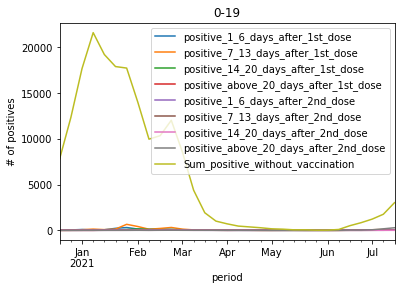

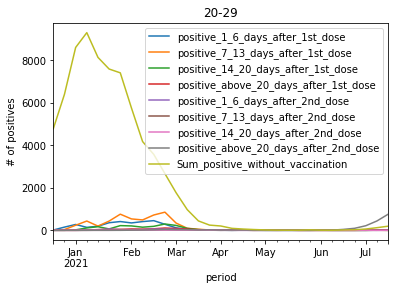

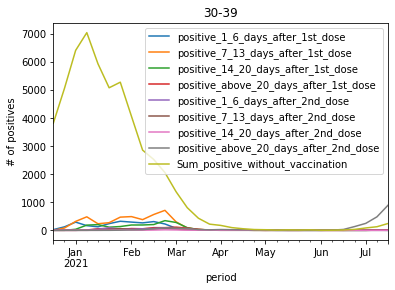

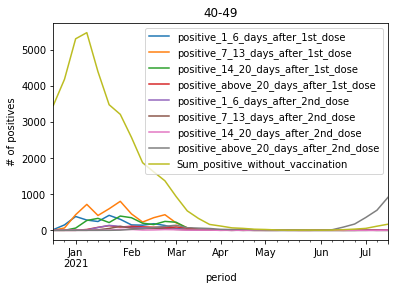

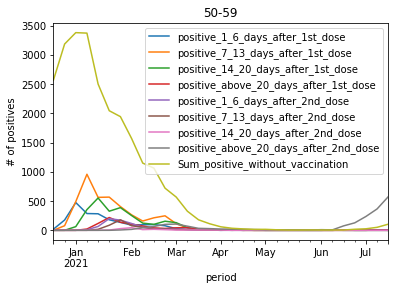

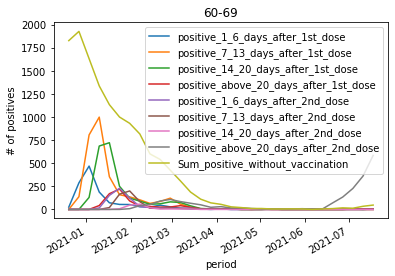

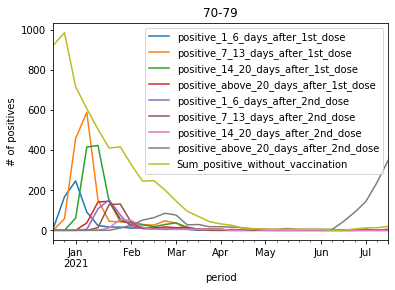

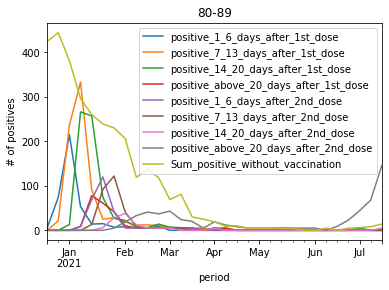

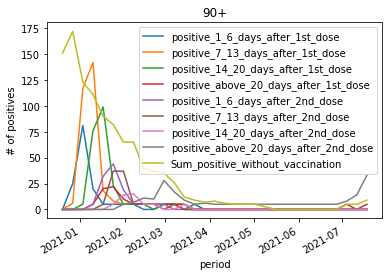

In [93]:
def clean_positive_count(count):
    if count is None:
        return 0.0
    if "<" in str(count):
        return float(count[1:])
    return float(count)

positive_count_cols = [c for c in records.columns if 'positive' in c]
records['WeekStart'] = pd.to_datetime(records['Week'].apply(lambda x: re.search('^\S+', x).group(0)))
for positive_count_col in positive_count_cols:
    records[positive_count_col] = records[positive_count_col].apply(clean_positive_count)
    
for age_group in records['Age_group'].unique():
    ax = records[records['Age_group'] == age_group].set_index('WeekStart')[positive_count_cols].plot()
    ax.set_title(f'{age_group}')
    ax.set_xlabel('period')
    ax.set_ylabel('# of positives')
